# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Midterm exam due Sunday, May 16
 - Design project posted
     - In-class presentation Wednesday, June 2
     - Final report due Friday, June 11 at midnight     

## Week 7

 - EE538 lecture notes
 - Photodiode Front Ends $-$ The REAL Story, *Opt. Photon. News, 12, 42-45 (April 2001).
 - AoE Chapter 8, Section 8.11 
 - AoE $-$ The x-Chapters, Section 4x.3 

## Overview

 - Last time...
     - Nonlinear device characteristics
     - Distortion in amplifiers
     - Total harmonic distortion
     - Intermodulation distortion
     - Effect of feedback on nonlinearity
     - Dynamic range
 - Today...
     - TIA frequency response and noise
     - Shot noise limit and minimizing added noise
     - Cascode isolation of photodiode capacitance
     - Regulated (i.e. gain-boosted) cascode
     - Boostrapping photodiode capacitance

## Python packages/modules

In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
import numpy as np
from scipy import signal
from scipy import integrate
from scipy.fft import fft
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.plot(x, y1, 'b', label=y1label)
    ax.plot(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )     

def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    
def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_log2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_loglog2(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.loglog(x, y1, 'b', label=y1label)
    ax.loglog(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   
    
def plot_bjt_NF(beta, r_bb, Rmin, Rmax, Imin, Imax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    T = 300
    q = 1.602e-19
    V_T = k*T/q
    rs = np.logspace(np.log10(Rmin), np.log10(Rmax), num = 100)
    ic = np.logspace(np.log10(Imin), np.log10(Imax), num = 100)
    I_C, R_S = np.meshgrid(ic, rs)
    e_n_2 = 4*k*T*(V_T/2/I_C + r_bb)
    i_n_2 = 2*q*I_C/beta_0
    NF = 1 + (e_n_2 + i_n_2*R_S**2)/(4*k*T*R_S)
    cp = ax.contourf(I_C, R_S, 10*np.log10(NF), levels=np.linspace(0,15, num=16))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Source Resistance $R_s$ [$\Omega$]')
    plt.xlabel(r'Collector Current $I_C$ [A]')
    fig.colorbar(cp)

def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

def fft_mag(x, N, T, t):
    fft_sig  = fft(x, N)  
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    mags = 2.0/N * np.abs(fft_sig[0:N//2]) # single-sided FFT
    
    return freqs, mags

def plot_fft_dB(freqs, mags, fmin, fmax):
    fig, ax = plt.subplots(figsize = (10.0,7.5))
    ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')
    ax.set_xlim(fmin, fmax)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid()

# Lecture 7 - Transimpedance Amplifier Design

## Photodiodes for wideband optical sensing

<center><img src="img/photodiode_resistor.png" width=600 /></center>

 - Photodiodes produce current in response to incident light (i.e. photons absorbed by the diode)
 
 - To convert this current to a voltage that can be processed by our signal conditional circuitry (e.g. filter, ADC, gain stage, etc.), we might consider using just a resistor, which produces an output voltage of $v_o = -i_d R_f$
 
 - The value of $R_f$ should be chosen such that its thermal noise current $4kT/R_f$ is neglible compared to the shot noise current of the diode $2qi_d$
 
 - To put this in concrete terms, assume our application requires a bandwidth of $500kHz$, a minimum signal level of $10\mu A$, and our photodiode has a reverse-biased depletion capacitance of $100pF$

 - The photodiode produces a shot noise current with power spectral density given by
 
\begin{equation}
i_{ns}^2 = 2qi_d
\end{equation}

 - To ensure the resistor contributes negligibly to the total noise, we might require the spectral density of its noise to be $10\%$ of that of the shot noise (this is a $0.5\%$ increase in the $rms$ current noise density, which could admittedly be too extreme)
 
 - Applying this constraint gives us an $R_f$ value of 
 
\begin{equation}
R_f = 10\cdot\dfrac{4kT}{2qi_d}
\end{equation}

 - If we need to design for a signal current of $10\mu A$, this necessitates an $R_f$ value of ~$50k\Omega$, which limits our $3dB$ bandwidth to $30kHz$, quite a bit lower than the target $500kHz$!
 
 - If the minimum signal amplitude were further reduced, our bandwidth would be even lower
 
 - How can we improve the situation?

## Transimpedance amplifier (TIA)

<center><img src="img/TIA_simple.png" width=700 /></center>

 - The transimpedance amplifier addresses this issue by using an opamp's virtual ground to present a low impedance to the capacitance of the photodiode
 
 - The input pole is effectively eliminated by the amplifier feedback (kind of)
 
 - The ideal transfer function of the TIA is given by
 
\begin{equation}
\dfrac{v_o}{i_d} = R_f
\end{equation}

 - Ignoring the opamp's noise (for the moment), the resistor value and its associated noise are identical to the above derivation
 

 

## TIA stability

<center><img src="img/TIA_stability.png" width=700 /></center>

 - Unfortunately, the required large value of $R_f$ contributes a parasitic pole to the *open-loop response* of the amplifier, compromising stability
 
 - $C_{in}$ is the total capacitance connected to the feedback node, which includes the input capacitance of the opamp and is often dominated by the photodiode's depletion capacitance
 
 - The addition of $C_f$ contributes a zero to the transfer function that can be used to compensate for the phase lag due to $R_f C_{in}$ 
 
 - $C_f$ addresses the stability issue, but what about bandwidth?

## TIA frequency response

 - The closed-loop transfer function of the TIA is second order, and can be expressed as
 
\begin{equation}
\dfrac{v_o}{i_d} = R_f\dfrac{\omega_0^2}{s^2 + 2\zeta\omega_0 + \omega_0^2}
\end{equation}

 - Assuming a single-pole response of the opamp given by the transfer function $A = A_0/(1+s/s_p)$ and a unity-gain frequency of $\omega_t \approx A_0 \omega_p$, where $\omega_p$ is the open-loop pole frequency, the closed-loop bandwidth is given by

\begin{equation}
\omega_0 \approx \sqrt{\dfrac{\omega_t}{R_f(C_{in} + C_f)}} = \sqrt{\omega_t\cdot \omega_{p,cl}}
\end{equation}

 - The damping factor (or, equivalently, the $Q$ factor) is given by
 
\begin{equation}
2\zeta = \dfrac{1}{Q} \approx R_fC_f\cdot\sqrt{\dfrac{\omega_t}{R_f(C_{in}+C_f)}}
\end{equation}

 - The $Q$ factor determines the "quality" of both the step and frequency responses, and it is typically desirable to keep $Q$ below some critical value for a "well-behaved" response


 - For a damping factor of $\zeta = 1/\sqrt{2}$ (or equivalently, $Q=1/\sqrt{2}$, a maximally flat response), and assuming $C_{in}>>C_f$, the required value of $C_f$ is approximately
 
\begin{equation}
C_f \approx \sqrt{\dfrac{2\cdot C_{in}}{R_f\omega_t}} = \dfrac{1}{R_f}\sqrt{\dfrac{2\cdot R_f C_{in}}{\omega_t}}
\end{equation}

 - That is, in order to achieve a "well-behaved response" the zero frequency $\omega_z = 1/R_fC_f$ should be equal to the geometric mean of the "parasitic" pole frequency $\omega_{p,cl} = 1/R_f(C_f+C_{in})$ and the opamp transit frequency $\omega_t$ ($\omega_z = \sqrt{\omega_{p,cl}\omega_t}$)
 
 - So, in order to achieve loop stability the closed-loop bandwidth can only exceed the parasitic pole frequency $w_{p,cl}$ by the square root of the ratio of $\omega_t$ to $\omega_{p,cl}$


## TIA noise

<center><img src="img/TIA_noise_model.png" width=700 /></center>

 - The basic transimpedance amplifier contains four noise sources, including the shot noise of the photodiode
 
 - $i_{naR_f} = 4kT/R_f$ should be minimized by choosing an appropriately large value of $R_f$
 
 - $i_{na}$ can be controlled by choosing an opamp with low input noise current (i.e. JFET- or CMOS-based, with the caveat that $1/f$ noise may be problematic with the latter, but generally only for narrow bandwidths)
 
 - Assuming these first two noise sources are appropriately managed, this leaves the opamp's voltage noise $e_{na}$, which at low frequencies can be input-referred by dividing by $R_f$:
 
\begin{equation}
i_{ne_{na},LF} = \dfrac{e_{na}}{R_f}
\end{equation}
 
 

 - How does a typical "low-noise" opamp stack up for low-noise photodiode applications?
 
 - Assuming $i_d = 10\mu A$, the diode's shot noise is given by
 
\begin{equation}
i_{ns} = \sqrt{2qi_d} = 1.8pA/\sqrt{Hz}
\end{equation}

 - To reduce $R_f$'s contribution to noise, let's use $R_f = 100k\Omega$, which gives an input-referred noise current $i_{nR_f} = \sqrt{4kT/R_f} \approx .4pA/\sqrt{Hz}$ 

 - Let's say $e_{na} = 5nV/\sqrt{Hz}$. This gives a low-frequency input-referred noise current due to $e_{na}$ of
 
\begin{equation}
i_{ne_{na},LF} = \dfrac{e_{na}}{R_f} = \dfrac{5nV/\sqrt{Hz}}{100k\Omega} = 50fA\sqrt{Hz}
\end{equation}

 - Not bad! Even an opamp with moderate noise performance does well, at least at low frequencies
 
 - What happens as we increase the bandwidth of the TIA?

## Noise peaking

<center><img src="img/TIA_noise_peaking.png" width=600 /></center>

 - Assuming an ideal (infinite-bandwidth) opamp, the noise transfer function is the input/output relationship for the amplifier voltage noise
 
\begin{align}
\dfrac{e_{na,out}}{e_{na}} &= \left(1+\dfrac{Z_f}{Z_{in}}\right)\\ 
\\
&= \dfrac{1+s(C_{in}+C_f)R_f}{1+sC_fR_f}
\end{align}

 - This expression has a zero at $1/R_f(C_{in}+C_f) \approx 1/R_fC_{in}$, which results in "peaking" of the output noise due to $e_{na}$ and significantly degrades the noise performance of the TIA
 
 - The noise due to $e_{na}$ rises with frequency, as the impedance of $C_{in}$ decreases

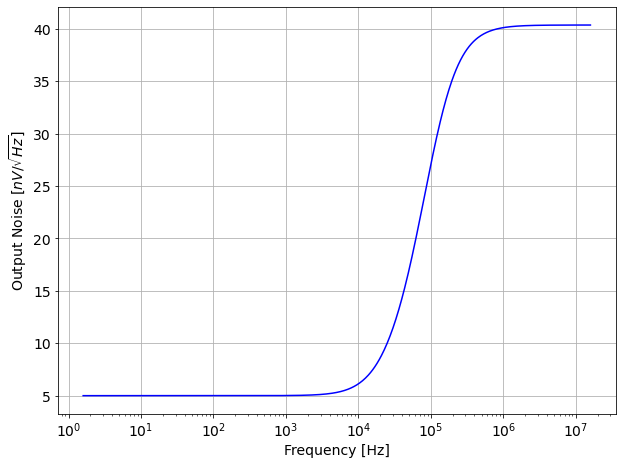

In [52]:
w = np.logspace(1, 8, num=700)
Cin = 100e-12
Rf = 100e3
wt = 10e6
Cf = np.sqrt(2*Cin/Rf/wt)
ena = 5e-9
G_noise = signal.TransferFunction([(Cin+Cf)*Rf, 1], [Cf*Rf, 1])
w, mag, phase = signal.bode(G_noise, w=w)
plot_logxy(w/2/np.pi, 1e9*10**(mag/20)*ena, 'Frequency [Hz]', r'Output Noise [$nV/\sqrt{Hz}$]')

 - The output noise begins rising at relatively low frequencies, substantially increasing the $rms$ noise

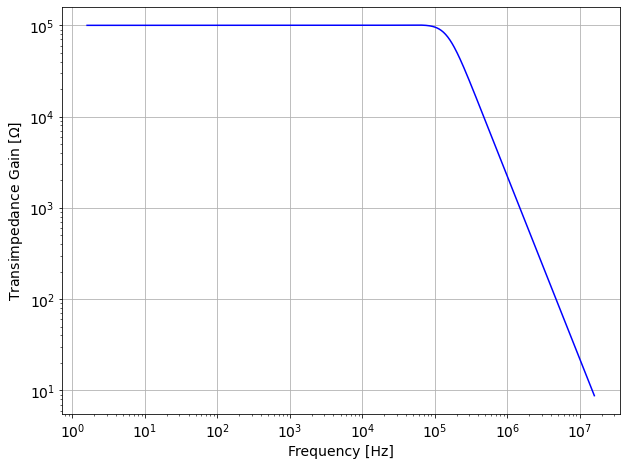

In [53]:
w0 = np.sqrt(wt/(Cin+Cf)/Rf)
zeta = Rf*Cf*w0/2
G_sig = signal.TransferFunction([Rf*w0**2], [1, 2*zeta*w0, w0**2])
w, mag, phase = signal.bode(G_sig, w=w)
plot_loglog(w/2/np.pi, 10**(mag/20), 'Frequency [Hz]', r'Transimpedance Gain [$\Omega$]')

 - Even worse, the bandwidth of the TIA has been significantly hampered by the large input capacitance
 - How can we (significantly) increase bandwidth while managing the $rms$ noise?

## Cascoded TIA

<center><img src="img/TIA_simple_cascode.png" width=700 /></center>

 - A cascode transistor ($Q_1$) can be used to isolate the large photodiode capacitance from the voltage noise of the amplifier
 
 - The opamp noise voltage at the feedback (inverting) node of the amplifier sees a high impedance, minimizing the resulting noise current
 
 - What effect does the $Q_1$ have on the signal, and what noise does it contribute?

## Cascode noise

<center><img src="img/TIA_cascode_noise.png" width=400 /></center>

 - The impedance looking into the emitter of $Q_1$ is given by $r_e = 1/g_m$
 
 - The diode is reverse-biased, so its resistance is high and $i_{nc}$ is approximately split between $r_e$ and $C_d$, resulting in a frequency-dependent output noise given by
 
\begin{equation}
i_{nc,out} = \dfrac{sC_dr_e}{sC_dr_e+1}i_{nc}
\end{equation}

 - Below the frequency $g_m/2\pi C_d$, $Q_1$ contributes only base current shot noise, which is $\beta$ times lower, in terms of power spectral density, than the shot noise current of the photodiode

 - Beyond this bandwidth, $Q_1$ contributes full shot noise, as the shot noise of the photodiode becomes attenuated (resulting in full shot noise at all frequencies)

## Common-base stage

<center><img src="img/TIA_common_base.png" width=400 /></center>

 - The cascode stage is often referred to as a *common-base* stage, since the base is common to  both the input (emitter) and output (collector)
 
 - As a voltage amplifier, its (midband) gain is non-inverting and given by
 
\begin{equation}
A_v = g_m R_C
\end{equation}
 
 - The input impedance of the cascode/common-base stage is critical in determining a) how much of the signal current makes it to the TIA input and b) the bandwidth limitations of the added cascode
 
 - At signal frequencies (where $C_{ac}$ constitutes a short) the common-base/cascode input impedance is given by $R_{in} = 1/g_m$

## Cascode frequency response

 - The photodiode signal current also sees an input impedance of $1/g_{m}$ (at low frequencies) due to the cascode device
 
 - At high frequencies, the diode capacitance $C_d$ shunts the signal current, reducing the current going into the TIA
 
 - The transfer function seen by the photodiode current is
 
\begin{equation}
i_{in} = \dfrac{1}{1 + sC_d/g_{m}}i_d 
\end{equation}
 
 - Assuming $i_d = 15\mu A$ and a collector current in $Q_1$ approximately equal to this value, the input impedance of the cascode device is approximately $1.7k\Omega$
 
 - For a photodiode capacitance of $500pF$, this results in a pole at ~$190kHz$, severely limiting the frequency response of the amplifier if wide bandwidth is needed
 
 - How can we reduce the input impedance of the cascode/common-gate stage and avoid significant bandwidth limitations?
 

## Biased cascode

<center><img src="img/TIA_biased_cascode.png" width=700 /></center>

 - The input impedance of the cascode stage can be reduced significantly by adding a DC bias to increase the frequency of the input pole, which is proportional to the value of $Q_1$'s collector current
 
 - $R_E$ can be chosen to set the collector current of $Q_1$ such that the $g_{m1}/C_d$ pole is placed outside of the TIA bandwidth
  
 - For example, if $I_{C}$ is set at $200\mu A$ the pole is moved from ~$190kHz$ to $2.5MHz$ due to the increase in $g_{m1}$
 
 - How does biasing the cascode stage affect noise performance? 

## Biased cascode noise

<center><img src="img/TIA_biased_cascode_noise.png" width=350 /></center>

 - The bias current of the cascode stage is developed based on the value of $R_E$ and the supply voltage, and is approximately given by $I_{C} = (V_{EE} - 0.6V)/R_E$
 
 - For a bias current of, say, $200\mu A$ and a supply voltage of $\pm 15V$, this gives $R_E \approx 72k\Omega$ ($R_C$ will be a similar value)
 
 - Still trying to limit the PSD of the thermal noise to $10\%$ of the shot noise limit sets a lower bound on the signal current:
 
\begin{equation}
i_d \geq 10\cdot\dfrac{4kT}{2q\cdot(R_E + R_C)} \approx 3.6\mu A
\end{equation}

 - The output noise contributed by $Q_1$ is minimized by $R_E$, and given by
 
\begin{equation}
i_{nc1,out}^2 = \dfrac{2qI_C}{(1+g_{m1}R_E)^2}
\end{equation}

## Base current noise

<center><img src="img/TIA_biased_cascode_base_current_noise.png" width=500 /></center>

 - Recall that the collector current of the BJT is the difference of the emitter and base currents: $I_C = I_E - I_B$

 - This means that even though $I_C$ is $I_B$ *less* than $I_E$, $I_B$'s shot noise of $2qI_B$ still manifests as a noise current at the collector and affects the noise performance of the TIA
 
 - In the biased cascode we have driven the collector current (and hopefully the thermal noise currents) to a negligible level but in the process we have *increased* base current shot noise, such that (in the best case)
 
\begin{equation}
i_{n,out} \approx i_{nb1}
\end{equation}

 - If $I_C = 200\mu A$ and $\beta = 200$ the resulting shot noise is equivalent to that of a $1\mu A$ photodiode current!
 
 - Thus, we have solved our bandwidth problem but have increased the noise (somewhat substantially)

## Regulated cascode

<center><img src="img/TIA_regulated_cascode.png" width=700 /></center>

 - We can achieve both low noise and low input impedance by applying feedback and decreasing $Q_1$'s collector current to reduce both its shot noise and the thermal noise from $R_E$ and $R_{C1}$
 
 - The regulated (or, gain-boosted) cascode works by amplifying $Q_1$'s emitter voltage and feeding it back to its base, effectively multiplying the transconductance of $Q_1$ by the voltage gain of the common-emitter amplifer formed by $Q_2$, $R_{C2}$
 
 - The input impedance of the regulated cascode is given by
 
\begin{equation}
R_{in} = \dfrac{1}{g_{m1}(1+g_{m2}R_{C2})}
\end{equation}

 - The result is an increase in the input pole frequency by the factor $g_{m2}R_{C2}$ *without* a substantial increase in $Q_1$'s collector current (or the resulting base current shot noise)

## Regulated cascode noise

<center><img src="img/TIA_regulated_cascode_noise.png" width=500 /></center>

 - $Q_1$'s shot noise is reduced even further by the $g_m$-boosting action of the $Q_2$ common-emitter stage, and is given approximately by

\begin{equation}
i_{nc1,out}^2 \approx \dfrac{2qI_{C1}}{(1+g_{m2}R_{C2}g_{m1}R_E)^2}
\end{equation}
 
 - $Q_2$'s shot noise sees a gain of
 
\begin{align}
i_{nc2,out} &= \dfrac{g_{m1}R_{C2}}{1+g_{m1}R_E}i_{nc2}\\
\end{align}

## Bootstrapping

<center><img src="img/TIA_bootstrapping_concept.png" width=700 /></center>

 - Recall that the mechanism producing rising noise due to $e_{na}$ with frequency is the resulting current through the photodiode capacitance, $i_{e_{na}} = e_{na}\omega C_d$
 
 - If we can ensure that the current through the diode capacitance is zero, the input noise due to $e_{na}$ will be limited to the nominal value $e_{na}/R_f$
 
 - This can be accomplished by the *feedforward* amplifier $G$, which is used to ensure that the noise voltage across the capacitance is zero, thus eliminating the rising amplifier noise
 
 - How do we implement the feedforward amplifier?

## Source follower bootstrapping

<center><img src="img/TIA_bootstrap.png" width=700 /></center>

 - The unity-gain amplifier can be realized as a JFET source follower, the input current of which and resulting current noise are small
 
 - At moderate frequencies the capacitor noise voltage due to the amplifier voltage noise is
 
\begin{equation}
e_{n,C_d} = e_{na} - \dfrac{g_mR_{eq}}{1+g_mR_{eq}}e_{na} =\dfrac{1}{1+g_mR_{eq}}e_{na}
\end{equation}

 - The resulting noise current magnitude is

\begin{equation}
|i_{n,C_d}| = \dfrac{e_{na}\omega C_d}{1+g_mR_{eq}}
\end{equation}

 - This is accurate to approximately $g_m/C_d$, at which point the source follower gain rolls off at $-20dB/dec$


## Effective capacitance

 - The current through $C_d$ determines the *effective* capacitance seen by the amplifier's voltage noise
 
 - The effective impedance is given by
 
\begin{equation}
|Z_{eff}| = \dfrac{1+g_mR_{eq}}{e_{na}\omega C_d}e_{na} = \dfrac{1+g_mR_{eq}}{\omega C_d}
\end{equation}

 - From this the effective capacitance is determined to be $C_d/(1+g_mR_{eq})$
 
 - Depending on the values of $g_m$ and $R_S$ boostrapping can reduce the effective capacitance by an order of magnitude or mor, where the reduction depends on the gain accuracy of the source follower

 - This effective capictance appears in parallel with the input capcitance of the opamp and the gate-drain capacitance of the source follower, the sum total of which may not be insigificant when seeking wide TIA bandwidths
 
 - In this case, choosing an opamp with low input capacitance becomes critical

## Source follower noise

<center><img src="img/TIA_SF_noise.png" width=700 /></center>

 - The source follower still suffers from noise peaking of its own voltage noise, resulting in a noise current of
 
\begin{equation}
|i_{n,C_d}^{'}| \approx e_{n}\omega C_d
\end{equation} 
 
 - However, $e_n$ can be designed to be significantly lower than the opamp voltage noise, particularly high-speed opamps which aren't necessarily optimized for low noise

## Summary

 - High sensitivity requires a large value of $R_f$, producing a low-frequency pole that limits the bandwidth achievable while maintaining stability (i.e. damping factor $\zeta$ greater than some minimum value)
 
 - Photodiode capacitance degrades both bandwidth/stability and noise performance of TIAs, requiring circuit techniques that increase bandwidth while controlling noise
 
 - Some circuit techniques that can be used to alleviate this tradeoff are
 
     - Cascoding to isolate the diode capacitance from the noise and feedback path of the amplifier
     
     - Bootstrapping to reduce the effective capacitance seen by the amplifier
     
     - A combination of the two